In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
pwd


'C:\\Users\\admin\\Downloads'

In [5]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv",index_col='Serial No.')

In [6]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# renaming columns
data.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','LOR ':'LOR','University Rating':'university_Rating','Chance of Admit ':'Chance_of_Admit'},inplace=True)

In [8]:
X = data.drop('Chance_of_Admit', axis=1)
y = data['Chance_of_Admit']


In [9]:
pca = PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

In [10]:
X_PCA = pd.DataFrame(X_PCA, columns=['PC1', 'PC2'])


In [11]:
X_PCA


,PC1,PC2
0,-23.273887,-0.783279
1,-6.811715,3.351076
2,1.841991,2.687708
3,-6.140811,-0.024660
4,4.212021,2.824404
...,...,...
495,-14.484897,5.912684
496,-22.957009,-0.008506
497,-17.942750,-5.731901
498,5.690921,1.610405


Text(0, 0.5, 'PC2')

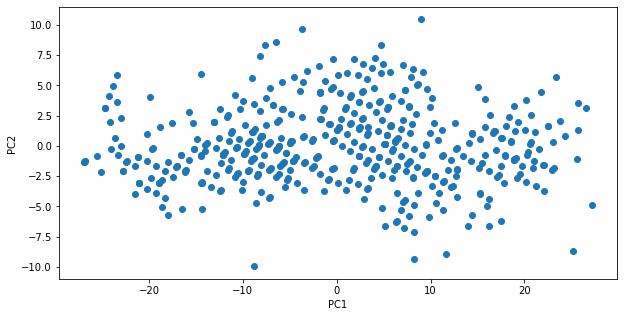

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(X_PCA['PC1'], X_PCA['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [13]:
pca.explained_variance_ratio_

array([0.92986706, 0.05763147])

In [14]:
PCA_max = np.argmax(X_PCA['PC1'])
PCA_min = np.argmin(X_PCA['PC1'])

print(PCA_max)
print(PCA_min)

377
202


In [15]:
X.iloc[PCA_max, :]


GRE                  290.00
TOEFL                100.00
university_Rating      1.00
SOP                    1.50
LOR                    2.00
CGPA                   7.56
Research               0.00
Name: 378, dtype: float64

In [16]:
X.iloc[PCA_min, :]


GRE                  340.00
TOEFL                120.00
university_Rating      5.00
SOP                    4.50
LOR                    4.50
CGPA                   9.91
Research               1.00
Name: 203, dtype: float64

In [17]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [18]:
pd.DataFrame(X)


,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [20]:
# Fitting linear regression Regression to the dataset
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [21]:
#Model Fitting,Model Evaluation
y_train_predict=model.predict(X_train)
mse = mean_squared_error(y_train, y_train_predict)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2=r2_score(y_train,y_train_predict)

print("The model performance for training set:")
print("\n")

print('MSE :',mse)
print('RMSE :',rmse)
print('R2_Score :',r2)

The model performance for training set:


MSE : 0.0035265554784557574
RMSE : 0.059384808482100516
R2_Score : 0.8210671369321554


In [22]:
#Predicting on testing
mse = mean_squared_error(y_test,pred)
rmse=(np.sqrt(mean_squared_error(y_test,pred)))
r2=r2_score(y_test,pred)

print("The model performance for testing set:")
print("\n")

print('MSE :',mse)
print('RMSE :',rmse)
print('R2_Score :',r2)

The model performance for testing set:


MSE : 0.0037046553987884114
RMSE : 0.06086588041578312
R2_Score : 0.8188432567829628


Text(0, 0.5, 'Actual value')

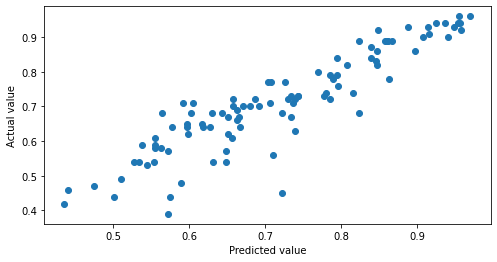

In [23]:
plt.figure(figsize=(8, 4))
plt.plot(pred, y_test, 'o')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
